### 2.2.2 区间量化（分箱）

In [2]:
import pandas as pd
import json

In [3]:
# 加载商户数据
biz_file = open('yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Occurrence')

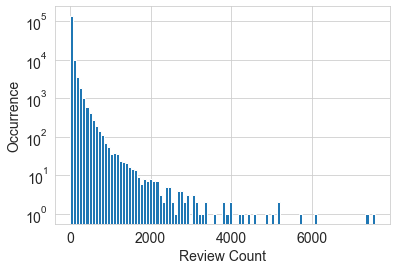

In [5]:
# 绘制点评数量直方图
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Review Count', fontsize = 14)
ax.set_ylabel('Occurrence', fontsize = 14)

#### 1. 固定宽度分箱

In [1]:
# 例子2-3 通过固定宽度分箱对计数值进行区间量化
import numpy as np
# 生成20个随机整数，均匀分布在0~99之间
small_counts = np.random.randint(0, 100, 20)
small_counts

array([10, 80,  3, 81, 25, 71,  2, 66, 79, 21, 45, 61, 87, 70, 76, 72, 14,
       33, 15, 39])

In [2]:
# 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是0~9
np.floor_divide(small_counts, 10)

array([1, 8, 0, 8, 2, 7, 0, 6, 7, 2, 4, 6, 8, 7, 7, 7, 1, 3, 1, 3],
      dtype=int32)

In [3]:
# 横跨若干数量级的计数值数组
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897,
                                44, 28, 7971, 926, 122, 22222]
# 通过对数函数映射到指数宽度分箱
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

#### 2. 分位数分箱